# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model


In [94]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print (df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [96]:
# frequency table for prestige and whether or not someone was admitted

# Find prestige's frequency and if admitted or not
new_df = df.groupby('prestige')['admit'].value_counts()
print (new_df)

prestige  admit
1.0       1        33
          0        28
2.0       0        95
          1        53
3.0       0        93
          1        28
4.0       0        55
          1        12
Name: admit, dtype: int64


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

          prestige       gre       gpa     admit
prestige  1.000000 -0.124533 -0.060976 -0.243563
gre      -0.124533  1.000000  0.382408  0.181202
gpa      -0.060976  0.382408  1.000000  0.174116
admit    -0.243563  0.181202  0.174116  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


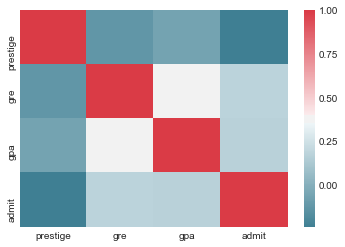

In [97]:
#Comparing variables for multicollinearity
#No high correlations found between variables but this is a singular matrix so we can have multicollinarity issues

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df[['prestige', 'gre', 'gpa','admit']].corr()
print (correlations)
print (sns.heatmap(correlations, cmap=cmap))


In [111]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='dummy', prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
print (dummy_ranks)

     dummy_1.0  dummy_2.0  dummy_3.0  dummy_4.0
0            0          0          1          0
1            0          0          1          0
2            1          0          0          0
3            0          0          0          1
4            0          0          0          1
5            0          1          0          0
6            1          0          0          0
7            0          1          0          0
8            0          0          1          0
9            0          1          0          0
10           0          0          0          1
11           1          0          0          0
12           1          0          0          0
13           0          1          0          0
14           1          0          0          0
15           0          0          1          0
16           0          0          0          1
17           0          0          1          0
18           0          1          0          0
19           1          0          0    

#### 2.2 When modeling our class variables, how many do we need? 



Answer: We normally need n-1 dummy variables so in this case we need 3 out of 4 variables because the fourth variable is implied in the three previous and therefore redundant

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [113]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_1':])
print (handCalc.head())




# No clue what this is about, no content explained yet

   admit    gre   gpa
0      0  380.0  3.61
1      1  660.0  3.67
2      1  800.0  4.00
3      1  640.0  3.19
4      0  520.0  2.93


In [114]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted

prestige_df = df.groupby('prestige')['admit'].value_counts()
print (prestige_df)

#I do not understand what is needed here ??????

prestige  admit
1.0       1        33
          0        28
2.0       0        95
          1        53
3.0       0        93
          1        28
4.0       0        55
          1        12
Name: admit, dtype: int64


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [ ]:
# No clue what this is about, no content explained yet

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [ ]:
# No clue what this is about, no content explained yet

#### 3.3 Calculate the odds ratio

In [ ]:
# No clue what this is about, no content explained yet

#### 3.4 Write this finding in a sentenance: 

Answer: 

#### 3.5 Print the cross tab for prestige_4

In [ ]:
# No clue what this is about, no content explained yet

#### 3.6 Calculate the OR 

In [ ]:
# No clue what this is about, no content explained yet

#### 3.7 Write this finding in a sentence

Answer:

## Part 4. Analysis

In [ ]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [ ]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

#### 4.2 Fit the model

#### 4.3 Print the summary results

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

#### 4.5 Interpret the OR of Prestige_2

Answer: 

#### 4.6 Interpret the OR of GPA

Answer: 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [ ]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [ ]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

#### 5.1 Recreate the dummy variables

In [ ]:
# recreate the dummy variables

# keep only what we need for making predictions


#### 5.2 Make predictions on the enumerated dataset

#### 5.3 Interpret findings for the last 4 observations

Answer: 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.